In [2]:
from graphviz import Source

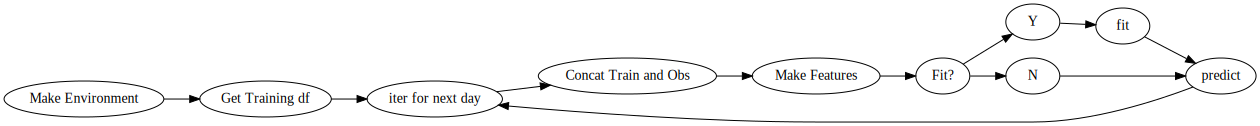

In [3]:
Source(
"""
    digraph G {
    rankdir = LR;
    
    "Make Environment" -> "Get Training df" -> "iter for next day"
    "iter for next day" -> "Concat Train and Obs" ->
    "Make Features" -> "Fit?" -> "Y"
    "Fit?" -> "N"
    "Y" -> "fit"
    "fit" -> "predict"
    "N" -> "predict"
    {rank="same"; "Y", "N"}
    "predict" -> "iter for next day"
    }
""")

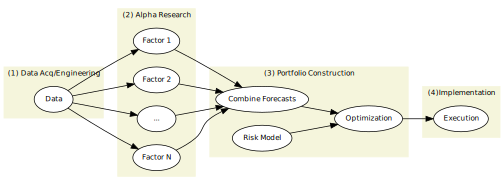

In [10]:
Source(
"""
    digraph G {
        size ="7,5";
        graph [fontsize=10 fontname="Verdana"];
        node [shape=oval fontsize=10 fontname="Verdana"];
        rankdir = LR;
       
        subgraph cluster_0 {
            label="(2) Alpha Research";
            style=filled;
            color=beige;
            node [style=filled; color=black; fillcolor=white]
            "Factor 1" "Factor 2";
             "..."
             node [style=filled; color=black; fillcolor=white]
             "Factor N";
        }
    
        subgraph cluster_1 {
            node [style=filled; color=black; fillcolor=white]
            label = "(3) Portfolio Construction"
            style=filled;
            color=beige;

            "Combine Forecasts" -> Optimization
            "Risk Model" -> Optimization 
        }
        
        subgraph cluster_2 {
            style=filled;
            color=beige;
            node [style=filled; color=black; fillcolor=white]
            label="(1) Data Acq/Engineering"
            "Data"
        
        }
        
        subgraph cluster_3 {
            style=filled;
            color=beige;
            node [style=filled; color=black; fillcolor=white]
            label="(4) Implementation"
            "Execution"        
        }
    
    "Data" -> "Factor 1" -> "Combine Forecasts"
    "Data" -> "Factor 2" -> "Combine Forecasts"
    "Data" -> "..." -> "Combine Forecasts"
    "Data" -> "Factor N" -> "Combine Forecasts"
    Optimization -> "Execution"
    
    }
""")

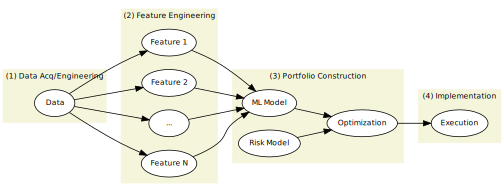

In [11]:
Source(
"""
    digraph G {
        size ="7,5";
        graph [fontsize=10 fontname="Verdana"];
        node [shape=oval fontsize=10 fontname="Verdana"];
        rankdir = LR;
       
        subgraph cluster_0 {
            label="(2) Feature Engineering";
            style=filled;
            color=beige;
            node [style=filled; color=black; fillcolor=white]
            "Feature 1" "Feature 2";
             "..."
             node [style=filled; color=black; fillcolor=white]
             "Feature N";
        }
    
        subgraph cluster_1 {
            node [style=filled; color=black; fillcolor=white]
            label = "(3) Portfolio Construction"
            style=filled;
            color=beige;

            "ML Model" -> Optimization
            "Risk Model" -> Optimization 
        }
        
        subgraph cluster_2 {
            style=filled;
            color=beige;
            node [style=filled; color=black; fillcolor=white]
            label="(1) Data Acq/Engineering"
            "Data"
        
        }
        
        subgraph cluster_3 {
            style=filled;
            color=beige;
            node [style=filled; color=black; fillcolor=white]
            label="(4) Implementation"
            "Execution"        
        }
    
    "Data" -> "Feature 1" -> "ML Model"
    "Data" -> "Feature 2" -> "ML Model"
    "Data" -> "..." -> "ML Model"
    "Data" -> "Feature N" -> "ML Model"
    Optimization -> "Execution"
    
    }
""")

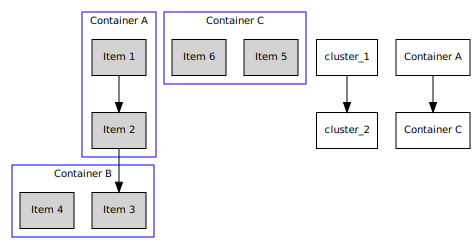

In [9]:
Source(
"""
    digraph G {

    graph [fontsize=10 fontname="Verdana"];
    node [shape=record fontsize=10 fontname="Verdana"];

    subgraph cluster_0 {
        node [style=filled];
        "Item 1" "Item 2";
        label = "Container A";
        color=blue;
    }

    subgraph cluster_1 {
        node [style=filled];
        "Item 3" "Item 4";
        label = "Container B";
        color=blue;
    }

    subgraph cluster_2 {
        node [style=filled];
        "Item 5" "Item 6";
        label = "Container C";
        color=blue;
    }

    // Renders fine
    "Item 1" -> "Item 2";
    "Item 2" -> "Item 3";

    // Both of these create new nodes
    cluster_1 -> cluster_2;
    "Container A" -> "Container C";
}
""")

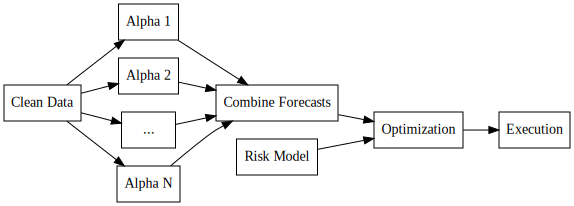

In [12]:
Source(
"""
    digraph G {
    rankdir = LR;
    node [shape=box];
    
    "Clean Data" -> "Alpha 1" -> "Combine Forecasts"
    "Clean Data" -> "Alpha 2" -> "Combine Forecasts"
    "Clean Data" -> "..." -> "Combine Forecasts"
    "Clean Data" -> "Alpha N" -> "Combine Forecasts" -> Optimization
    "Risk Model" -> Optimization -> "Execution"
    
    }
""")

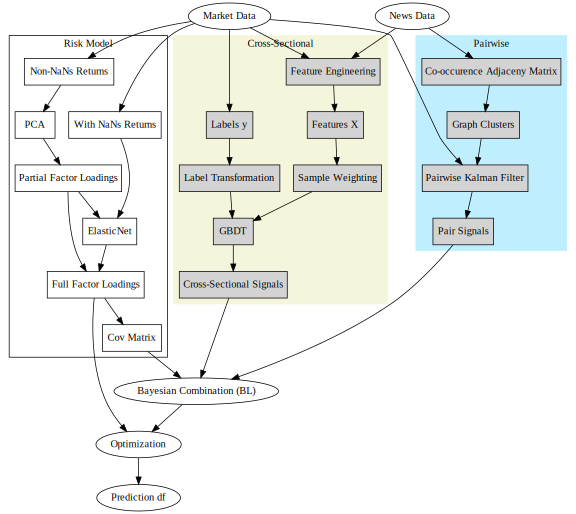

In [10]:
Source(
    """
 digraph G {
 size ="8,8";
	subgraph cluster_1 {
    style=filled;
		node [style=filled, shape=box];
		"Feature Engineering" -> "Features X" -> "Sample Weighting"->"GBDT";
     "Labels y" -> "Label Transformation" -> "GBDT";
     //"GBDT" -> "Hyperparameter Search" -> "GBDT";
     "GBDT" -> "Cross-Sectional Signals"
		label = "Cross-Sectional";
		color=beige
	}

    subgraph cluster_2 {
        style=filled;
		node [style=filled, shape=box];
		"Co-occurence Adjaceny Matrix" -> "Graph Clusters" -> "Pairwise Kalman Filter" -> "Pair Signals"
		label = "Pairwise";
		color=lightblue1
	}
    
    subgraph cluster_3 {
		node [style=open, shape=box];
		"Non-NaNs Returns" -> "PCA" -> "Partial Factor Loadings" -> "ElasticNet"
        "With NaNs Returns" -> "ElasticNet"
        "Partial Factor Loadings" -> "Full Factor Loadings"
        "ElasticNet" -> "Full Factor Loadings"
        "Full Factor Loadings" -> "Cov Matrix"
		label = "Risk Model";
		color=black
        {rank = same; "With NaNs Returns", "PCA";}
	}
    
    "Market Data" -> "Feature Engineering"
     "Market Data" -> "Labels y"
    "News Data" -> "Feature Engineering"
    "News Data" -> "Co-occurence Adjaceny Matrix"
    "Market Data" -> "Pairwise Kalman Filter"
    "Cov Matrix" -> "Bayesian Combination (BL)"
    "Pair Signals" -> "Bayesian Combination (BL)"
  "Cross-Sectional Signals" -> "Bayesian Combination (BL)" -> "Optimization"
  "Market Data" -> "Non-NaNs Returns"
  "Market Data" -> "With NaNs Returns"
  "Full Factor Loadings" -> "Optimization"
  {rank = same; "Bayesian Combination (BL)";}
  //{rank = same; "Pair Signals", "Cross-Sectional Signals"}
  "Optimization" -> "Prediction df"
}
"""
)